**Heart Attack Prediction in Indonesia**

In [5]:
# Check the data types of each column
print(df.dtypes)


age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
smoking_status                     object
alcohol_consumption                object
physical_activity                  object
dietary_habits                     object
air_pollution_exposure             object
stress_level                       object
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                       int64
EKG_results                       

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/heart_attack_prediction_indonesia.csv")

# Display the first few rows of the dataset
print(df.head())


   age  gender region income_level  hypertension  diabetes  cholesterol_level  \
0   60    Male  Rural       Middle             0         1                211   
1   53  Female  Urban          Low             0         0                208   
2   62  Female  Urban          Low             0         0                231   
3   73    Male  Urban          Low             1         0                202   
4   52    Male  Urban       Middle             1         0                232   

   obesity  waist_circumference  family_history  ... blood_pressure_diastolic  \
0        0                   83               0  ...                       62   
1        0                  106               1  ...                       76   
2        1                  112               1  ...                       74   
3        0                   82               1  ...                       65   
4        0                   89               0  ...                       75   

  fasting_blood_sugar chol

In [6]:
# Fill missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [7]:
# Check if there are still missing values
print(df.isnull().sum())

age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     0
EKG_results                       0
previous_heart_disease            0
medication_usage                  0
participated_in_free_screening    0
heart_attack                

In [8]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [10]:
# Check the column names of the dataset
print(df.columns)


Index(['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity',
       'waist_circumference', 'family_history', 'sleep_hours',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'previous_heart_disease', 'medication_usage',
       'participated_in_free_screening', 'heart_attack', 'gender_Male',
       'region_Urban', 'income_level_Low', 'income_level_Middle',
       'smoking_status_Never', 'smoking_status_Past',
       'alcohol_consumption_Moderate', 'physical_activity_Low',
       'physical_activity_Moderate', 'dietary_habits_Unhealthy',
       'air_pollution_exposure_Low', 'air_pollution_exposure_Moderate',
       'stress_level_Low', 'stress_level_Moderate', 'EKG_results_Normal'],
      dtype='object')


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop("heart_attack", axis=1))  # Drop the target column for scaling


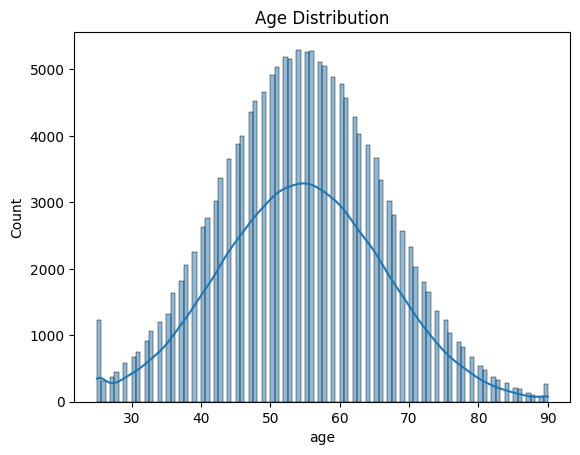

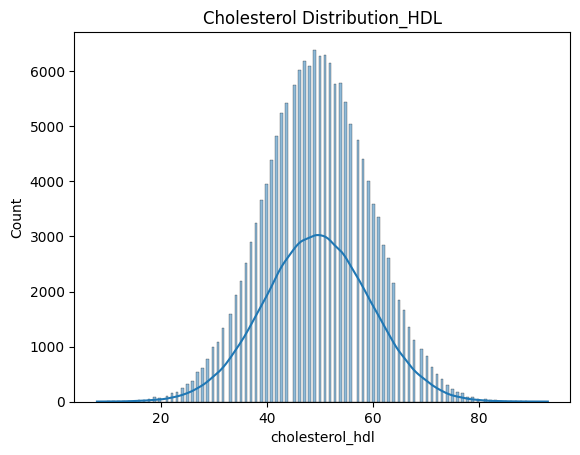

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of age and cholesterol
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df['cholesterol_hdl'], kde=True)
plt.title("Cholesterol Distribution_HDL")
plt.show()


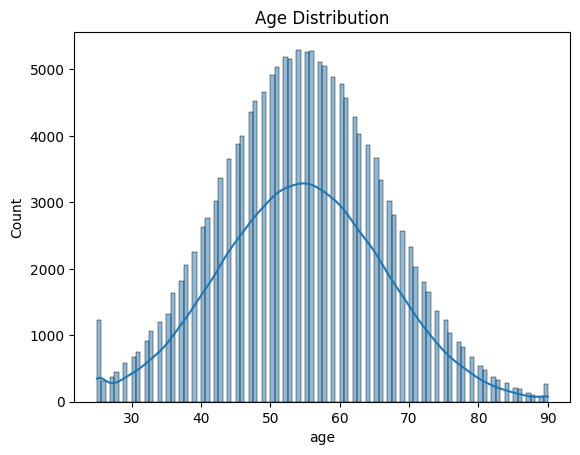

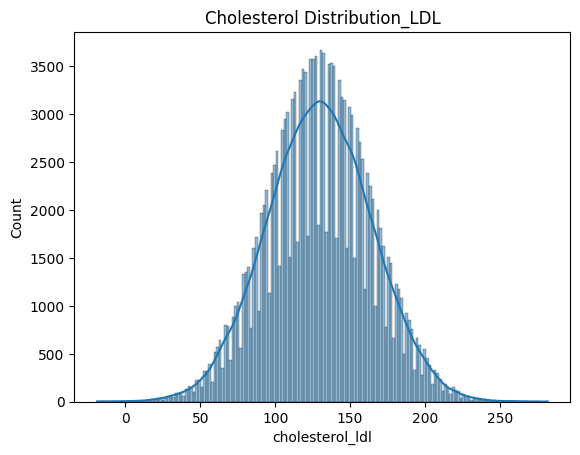

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of age and cholesterol
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df['cholesterol_ldl'], kde=True)
plt.title("Cholesterol Distribution_LDL")
plt.show()


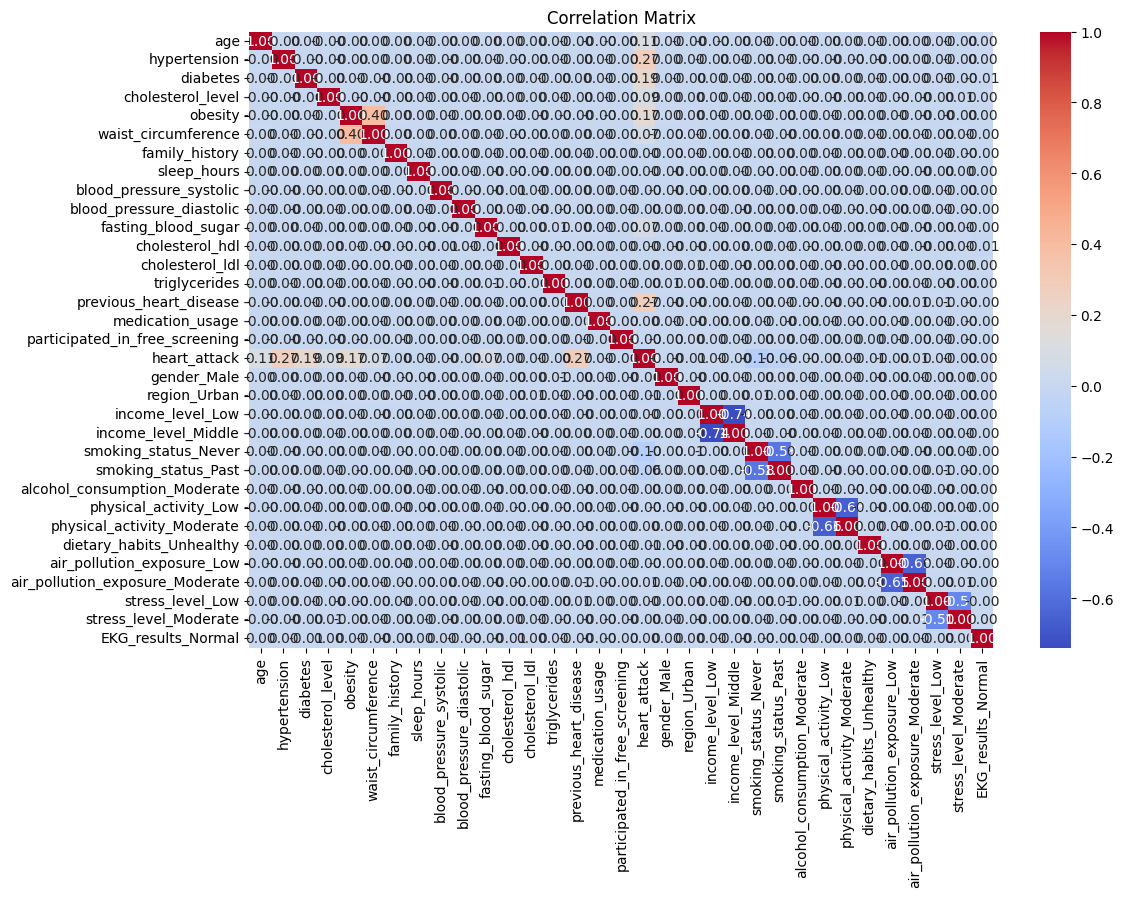

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [16]:
pip install scikit-learn

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop("heart_attack", axis=1)  # Features
y = df["heart_attack"]  # Target column (whether heart attack occurred)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 72.59%
Confusion Matrix:
[[15450  3456]
 [ 5225  7540]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78     18906
           1       0.69      0.59      0.63     12765

    accuracy                           0.73     31671
   macro avg       0.72      0.70      0.71     31671
weighted avg       0.72      0.73      0.72     31671



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 73.08%
